In [10]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import unicodedata

In [11]:
DATA_DIR = r"C:\Users\user\Documents\Python Scripts\AI\PL01"
file_name = "manutencoes_reparacoes.csv"
path = os.path.join(DATA_DIR, file_name)

# Check if file exists
print("Exists?", os.path.exists(path))

# Load CSV
df = pd.read_csv(path, low_memory=False)
print("Initial shape:", df.shape)




Exists? True
Initial shape: (820, 12)


In [12]:
# Normalize column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns.astype(str)]
print("Columns:", df.columns.tolist())

Columns: ['manutencao_id', 'condominio', 'tipo_intervencao', 'area_afetada', 'descricao', 'data_reportada', 'data_inicio', 'data_conclusao', 'fornecedor', 'custo_total', 'urgencia', 'estado']


In [13]:
display(df.info())
print("\n--- .describe(include='all') ---")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manutencao_id     820 non-null    object 
 1   condominio        820 non-null    object 
 2   tipo_intervencao  820 non-null    object 
 3   area_afetada      820 non-null    object 
 4   descricao         797 non-null    object 
 5   data_reportada    820 non-null    object 
 6   data_inicio       820 non-null    object 
 7   data_conclusao    775 non-null    object 
 8   fornecedor        807 non-null    object 
 9   custo_total       805 non-null    float64
 10  urgencia          820 non-null    object 
 11  estado            820 non-null    object 
dtypes: float64(1), object(11)
memory usage: 77.0+ KB


None


--- .describe(include='all') ---


In [14]:
display(df.describe(include='all').transpose())
print("\nShape:", df.shape)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
manutencao_id,820,800,MN00201,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condominio,820,18,Torres do Sol,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_intervencao,820,8,Manutenção preventiva,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_afetada,820,9,Elevador,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descricao,797,46,Necessária inspeção periódica obrigatória,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_reportada,820,481,07/10/2023,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_inicio,820,487,06/05/2024,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_conclusao,775,476,08/07/2024,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fornecedor,807,18,ProServiços SA,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
custo_total,805.0,NaN,NaN,NaN,46240.693143,758679.408783,-324.66,785.25,1727.9,4150.66,18336400.0



Shape: (820, 12)


In [15]:
display("manutencoes_head", df.head(50))

'manutencoes_head'

,manutencao_id,condominio,tipo_intervencao,area_afetada,descricao,data_reportada,data_inicio,data_conclusao,fornecedor,custo_total,urgencia,estado
0,MN00001,jardins da cidade,Reparação urgente,Fachada,Humidade ascendente no piso térreo,27/05/2024,31/05/2024,05/06/2024,ProServiços Solutions,2769.76,Alta,Concluído
1,MN00002,condomínio central,Inspeção,Elevador,Avaria no sistema de travagem,30/10/2023,02/11/2023,08/11/2023,TecnoReparações Unipessoal,4026.20,Alta,Concluído
2,MN00003,residencial atlântico,Melhoria,Garagem,Piso com fissuras e buracos,28/10/2024,28/10/2024,02/11/2024,ProServiços Group,3245.18,Crítica,Concluído
3,MN00004,Torres do Sol,Inspeção,Jardim,Poda de árvores urgente,01/06/2025,03/06/2025,13/06/2025,ProServiços Group,76.06,alta,Concluído
4,MN00005,TORRES DO SOL,Reparação urgente,Telhado,Estrutura de suporte com sinais de degradação,19/07/2025,25/07/2025,29/07/2025,GlobalTec Group,13734.16,Alta,Concluído
5,MN00006,vila verde,Reparação urgente,Piscina,Vedação de segurança danificada,07/05/2024,09/05/2024,15/05/2024,masterfix lda,1932.70,Alta,Concluído
6,MN00007,Vila Verde,Inspeção,Elevador,Ruído excessivo durante funcionamento,16/07/2024,02/09/2024,08/08/2024,masterfix lda,4496.97,Baixa,Concluído
7,MN00008,jardins da cidade,Inspeção,Elevador,Botões do painel não respondem,02/05/2024,04/05/2024,08/05/2024,SmartRepair Solutions,3901.79,Crítica,Concluído
8,MN00009,vila verde,Inspeção,Fachada,Pintura descascada em várias zonas,28/03/2025,31/03/2025,07/04/2025,SmartRepair Lda,7725.41,Alta,Concluído
9,MN00010,RESIDENCIAL ATLÂNTICO,Manutenção preventiva,Elevador,Avaria no sistema de travagem,23/07/2024,01/08/2024,17/08/2024,GlobalTec Unipessoal,2784.13,Média,Concluído


In [16]:
def smart_title_pt(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = re.sub(r"\s+", " ", s)
    t = s.title()
    lowers = {"De","Da","Do","Das","Dos","E","Em","No","Na","Nos","Nas",
              "Ao","Aos","À","Às","Para","Por","Com"}
    parts = t.split(" ")
    for i in range(1, len(parts)):
        if parts[i] in lowers:
            parts[i] = parts[i].lower()
    return " ".join(parts)

# Aplica ao campo 'condominio' (com backup opcional)
if "condominio" in df.columns:
    if "condominio_raw" not in df.columns:
        df["condominio_raw"] = df["condominio"].astype(str)
    df["condominio"] = df["condominio"].astype(str).apply(smart_title_pt)
    print(df)

    manutencao_id             condominio       tipo_intervencao area_afetada  \
0         MN00001      Jardins da Cidade      Reparação urgente      Fachada   
1         MN00002     Condomínio Central               Inspeção     Elevador   
2         MN00003  Residencial Atlântico               Melhoria      Garagem   
3         MN00004          Torres do Sol               Inspeção       Jardim   
4         MN00005          Torres do Sol      Reparação urgente      Telhado   
..            ...                    ...                    ...          ...   
815       MN00442          Torres do Sol      REPARAÇÃO URGENTE     Elevador   
816       MN00387  Residencial Atlântico  Manutenção preventiva       Jardim   
817       MN00639  Residencial Atlântico               Inspeção      Telhado   
818       MN00194   Quinta das Palmeiras               Melhoria     Elevador   
819       MN00625      Jardins da Cidade  Manutencao preventiva     Elevador   

                                       

In [17]:
# 2) Data types & candidate date columns conversion
date_cols = [c for c in df.columns if 'data' in c or 'date' in c or 'dia' in c]
print("Detected potential date columns:", date_cols)
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce', dayfirst=True)
    print(f"Converted {c} -> dtype {df[c].dtype}, nulls: {df[c].isnull().sum()}")

Detected potential date columns: ['data_reportada', 'data_inicio', 'data_conclusao']
Converted data_reportada -> dtype datetime64[ns], nulls: 0
Converted data_inicio -> dtype datetime64[ns], nulls: 0
Converted data_conclusao -> dtype datetime64[ns], nulls: 45


In [18]:
# 3) Cardinality of categorical variables
cat_stats = []
for c in df.columns:
    nunique = df[c].nunique(dropna=True)
    nunique_pct = nunique / max(1, len(df))
    cat_stats.append((c, str(df[c].dtype), nunique, f"{nunique_pct:.3f}"))
cat_stats_df = pd.DataFrame(cat_stats, columns=["column","dtype","nunique","nunique_pct"])
display("column_cardinality", cat_stats_df.sort_values("nunique", ascending=False).head(200))

'column_cardinality'

,column,dtype,nunique,nunique_pct
0,manutencao_id,object,800,0.976
9,custo_total,float64,784,0.956
6,data_inicio,datetime64[ns],487,0.594
5,data_reportada,datetime64[ns],481,0.587
7,data_conclusao,datetime64[ns],476,0.580
4,descricao,object,46,0.056
8,fornecedor,object,18,0.022
12,condominio_raw,object,18,0.022
10,urgencia,object,10,0.012
3,area_afetada,object,9,0.011


In [19]:
# 4) Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
display("missing_values", missing.reset_index().rename(columns={"index":"column",0:"missing_count"}))


'missing_values'

,column,missing_count
0,data_conclusao,45
1,descricao,23
2,custo_total,15
3,fornecedor,13
4,manutencao_id,0
5,area_afetada,0
6,tipo_intervencao,0
7,condominio,0
8,data_inicio,0
9,data_reportada,0


In [20]:
# 5) Duplicates
dupes = df.duplicated().sum()
print("Duplicate rows:", dupes)
if dupes>0:
    # decide to drop exact duplicates
    df = df.drop_duplicates()
    print("Dropped exact duplicates. New shape:", df.shape)

Duplicate rows: 18
Dropped exact duplicates. New shape: (802, 13)


In [21]:
# 6) Attempt numeric conversions for likely numeric columns
for c in df.columns:
    if df[c].dtype == object:
        sample = df[c].dropna().astype(str).head(200)
        # proportion numeric-like entries
        numeric_like = sample.str.replace(r'[^\d\.\-]', '', regex=True).str.fullmatch(r'-?\d+(\.\d+)?').sum()
        if len(sample)>0 and numeric_like/len(sample) > 0.6:
            df[c] = pd.to_numeric(df[c].str.replace(r'[^\d\.\-]', '', regex=True), errors='coerce')
            print(f"Converted column to numeric: {c}")



Converted column to numeric: manutencao_id


In [22]:
# 7) Basic groupby examples: counts by tipo_intervencao and by area_afetada
for c in ['tipo_intervencao','area_afetada']:
    if c in df.columns:
        vc = df[c].value_counts(dropna=False).head(20)
        print(f"\nTop values for {c}:")
        display(vc)


Top values for tipo_intervencao:


tipo_intervencao
Manutenção preventiva    256
Reparação urgente        238
Melhoria                 155
Inspeção                 110
Inspecção                 14
melhoria                  11
Manutencao preventiva      9
REPARAÇÃO URGENTE          9
Name: count, dtype: int64


Top values for area_afetada:


area_afetada
Elevador    216
Garagem     127
Jardim      121
Telhado     112
Piscina      81
Fachada      70
Hall         69
Elvador       4
Jardm         2
Name: count, dtype: int64

In [23]:
# 8) Outlier detection for numeric columns using z-score
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary = {}
for c in num_cols:
    series = df[c].dropna()
    if len(series) >= 5:
        z = np.abs(stats.zscore(series))
        outlier_count = int((z>3).sum())
        outlier_summary[c] = outlier_count
print("\nOutlier counts by numeric column:", outlier_summary)


Outlier counts by numeric column: {'manutencao_id': 0, 'custo_total': 2}


In [24]:
# 9) Business validations: NIF-like field detection
nif_candidates = [c for c in df.columns if 'nif' in c or 'numero_fiscal' in c or 'nif' in c]
print("NIF candidates:", nif_candidates)
for c in nif_candidates:
    vals = df[c].astype(str).str.replace(r'\D','',regex=True)
    print(c, "9-digit count:", (vals.str.len()==9).sum(), "total_nonnull:", vals.ne('nan').sum())


NIF candidates: []


In [25]:
# 10) Memory optimization: show before and after converting object columns with low cardinality to category
mem_before = df.memory_usage(deep=True).sum()
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
converted = []
for c in obj_cols:
    nunique = df[c].nunique(dropna=True)
    if nunique>0 and (nunique/len(df) < 0.5) and nunique < 5000:
        df[c] = df[c].astype('category')
        converted.append((c, nunique))
mem_after = df.memory_usage(deep=True).sum()
print(f"\nMemory before: {mem_before/1024**2:.2f} MB, after: {mem_after/1024**2:.2f} MB")
print("Converted to category:", converted)


Memory before: 0.50 MB, after: 0.06 MB
Converted to category: [('condominio', 6), ('tipo_intervencao', 8), ('area_afetada', 9), ('descricao', 46), ('fornecedor', 18), ('urgencia', 10), ('estado', 8), ('condominio_raw', 18)]


In [26]:
# Save cleaned dataframe
out_path = os.path.join(DATA_DIR, "manutencoes_reparacoes_cleaned.csv")
df.to_csv(out_path, index=False)
print("Saved cleaned file to:", out_path)

Saved cleaned file to: C:\Users\user\Documents\Python Scripts\AI\PL01\manutencoes_reparacoes_cleaned.csv


In [27]:
# 10 Visual analyses (structure: question, plot, technical interpretation, business insight, recommendation)
# We'll generate analyses that make sense for maintenance/repairs datasets.
analyses = []

def plot_and_store(title, fig, interpretation, insight, action):
    display(fig)
    plt.close(fig)
    analyses.append({"title": title, "interpretation": interpretation, "insight": insight, "action": action})


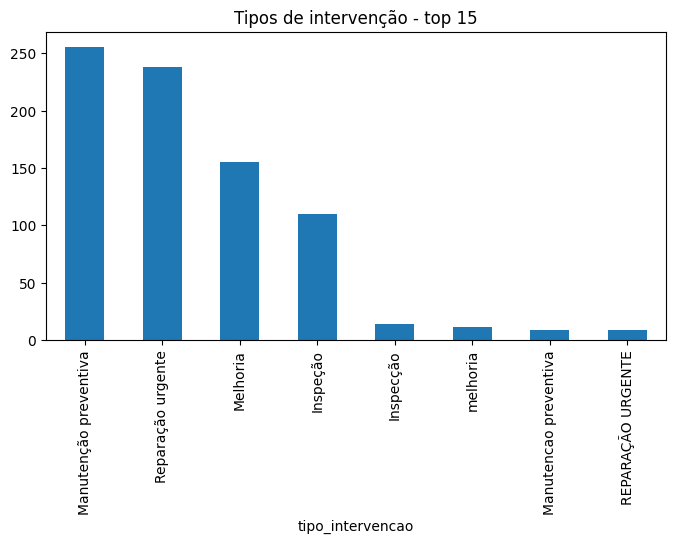

In [28]:
# A1: Distribution of intervention types
if 'tipo_intervencao' in df.columns:
    q = "Que tipos de intervenção ocorrem com maior frequência?"
    s = df['tipo_intervencao'].value_counts().head(15)
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    s.plot(kind='bar', ax=ax)
    ax.set_title("Tipos de intervenção - top 15")
    plot_and_store(q, fig,
                   "Mostra quais intervenções são mais frequentes, indicando foco operacional.",
                   "Alta concentração indica processos padronizados ou pontos críticos na infra-estrutura.",
                   "Priorizar procedimentos padrão e formação para os 3 tipos top; rever custos associados.")



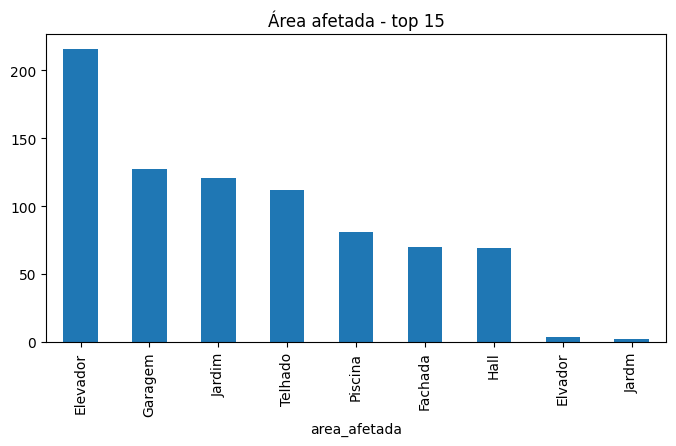

In [29]:
# A2: Área afetada distribution
if 'area_afetada' in df.columns:
    q = "Quais áreas (zonas) têm mais ocorrências?"
    s = df['area_afetada'].value_counts().head(15)
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    s.plot(kind='bar', ax=ax)
    ax.set_title("Área afetada - top 15")
    plot_and_store(q, fig,
                   "Identifica zonas com maior número de eventos.",
                   "Concentração em poucas áreas pode indicar problemas estruturais ou uso intensivo.",
                   "Programar inspeções preventivas específicas para as áreas top 5.")


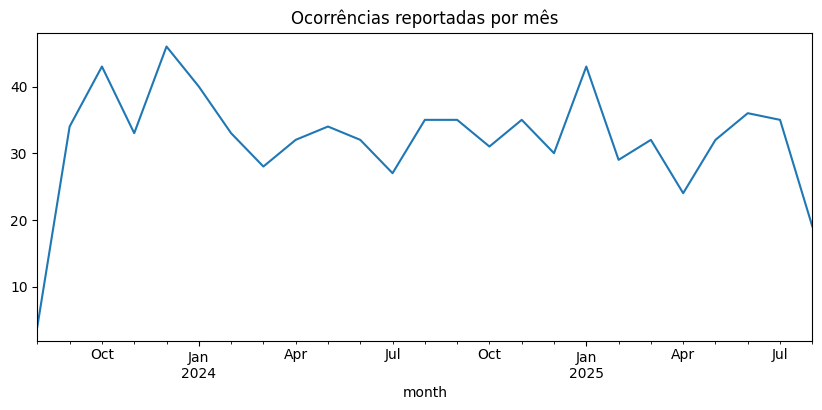

In [30]:
# A3: Time trend of reported dates
if 'data_reportada' in df.columns and not df['data_reportada'].isnull().all():
    q = "Há tendência temporal nas notificações?"
    tmp = df.dropna(subset=['data_reportada']).copy()
    tmp['month'] = tmp['data_reportada'].dt.to_period('M')
    monthly = tmp.groupby('month').size()
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    monthly.plot(kind='line', ax=ax)
    ax.set_title("Ocorrências reportadas por mês")
    plot_and_store(q, fig,
                   "Mostra variações mensais — picos podem indicar sazonalidade ou incidentes específicos.",
                   "Se picos coincidem com estações, planeamento sazonal é necessário.",
                   "Investigar picos e ligar a eventos (ex.: chuva intensa, obras).")



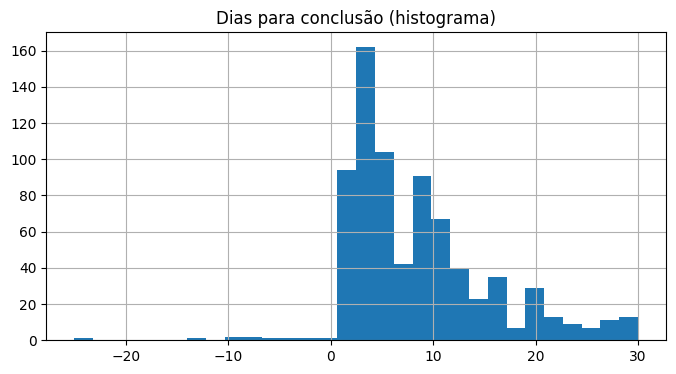

In [31]:
# A4: Time to resolution if both dates exist
if 'data_inicio' in df.columns and 'data_conclusao' in df.columns and df['data_inicio'].notnull().any() and df['data_conclusao'].notnull().any():
    q = "Quanto tempo, em dias, demora a concluir intervenções?"
    tmp = df.dropna(subset=['data_inicio','data_conclusao']).copy()
    tmp['days_to_close'] = (tmp['data_conclusao'] - tmp['data_inicio']).dt.total_seconds()/86400
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    tmp['days_to_close'].hist(bins=30, ax=ax)
    ax.set_title("Dias para conclusão (histograma)")
    plot_and_store(q, fig,
                   tmp['days_to_close'].describe().to_dict(),
                   "Distribuição de tempos de resolução; cauda longa indica alguns casos demorados.",
                   "Definir SLAs e escalonamento para casos que ultrapassem percentil 90.")



In [32]:
# A5: Cost distribution (if custo exists)
if 'custo' in df.columns:
    q = "Como se distribuem os custos das intervenções?"
    s = df['custo'].dropna().astype(float)
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    s.hist(bins=40, ax=ax)
    ax.set_title("Histograma de custos")
    plot_and_store(q, fig,
                   s.describe().to_dict(),
                   "Possível assimetria com alguns trabalhos custosos.",
                   "Auditar top 10 custos para negociar contratos/alternativas.")



In [33]:
# A6: Top suppliers by total cost (if fornecedor present)
supplier_col = None
for c in df.columns:
    if 'fornecedor' in c or 'empresa' in c or 'prestador' in c:
        supplier_col = c
        break
if supplier_col and 'custo' in df.columns:
    q = f"Quais fornecedores acumulam mais custo? ({supplier_col})"
    grouped = df.groupby(supplier_col)['custo'].agg(['count','sum']).sort_values('sum', ascending=False).head(15)
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    grouped['sum'].plot(kind='bar', ax=ax)
    ax.set_title("Top fornecedores por custo")
    plot_and_store(q, fig,
                   grouped,
                   "Concentração de custo em poucos fornecedores pode indicar dependência.",
                   "Renegociar contratos e qualificar fornecedores alternativos.")



In [34]:
# A7: Urgency vs cost boxplot (if urgencia exists)
priority_col = None
for c in df.columns:
    if 'urgencia' in c or 'prioridade' in c or 'priori' in c:
        priority_col = c
        break
if priority_col and 'custo' in df.columns:
    q = "A urgência está associada a custos mais elevados?"
    tmp = df.dropna(subset=[priority_col,'custo']).copy()
    # ensure priority is categorical string
    tmp[priority_col] = tmp[priority_col].astype(str)
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    tmp.boxplot(column='custo', by=priority_col, ax=ax)
    ax.set_title("Custo por nível de urgência")
    plt.suptitle("")
    plot_and_store(q, fig,
                   tmp.groupby(priority_col)['custo'].describe(),
                   "Níveis mais altos de urgência tendem a maiores medianas de custo.",
                   "Priorizar redução de ocorrências urgentes via manutenção preventiva.")



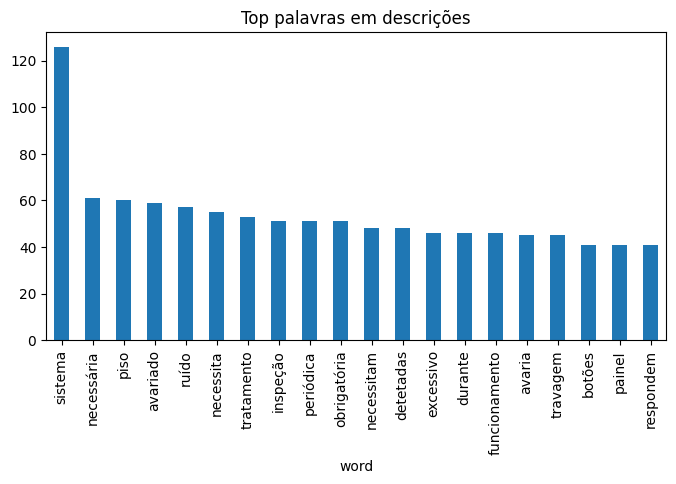

In [35]:
# A8: Top descriptions keywords (simple text processing)
if 'descricao' in df.columns:
    q = "Quais palavras aparecem mais nas descrições (top keywords)?"
    from collections import Counter
    txt = " ".join(df['descricao'].dropna().astype(str).str.lower().tolist())
    words = [w.strip('.,;:()[]') for w in txt.split() if len(w)>3]
    common = Counter(words).most_common(20)
    keywords = pd.DataFrame(common, columns=['word','count']).set_index('word')
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    keywords['count'].plot(kind='bar', ax=ax)
    ax.set_title("Top palavras em descrições")
    plot_and_store(q, fig,
                   keywords.head(20),
                   "Palavras recorrentes ajudam a identificar problemas comuns (ex.: 'canalização', 'infiltração').",
                   "Criar templates de diagnóstico e checklists para os problemas mais frequentes.")



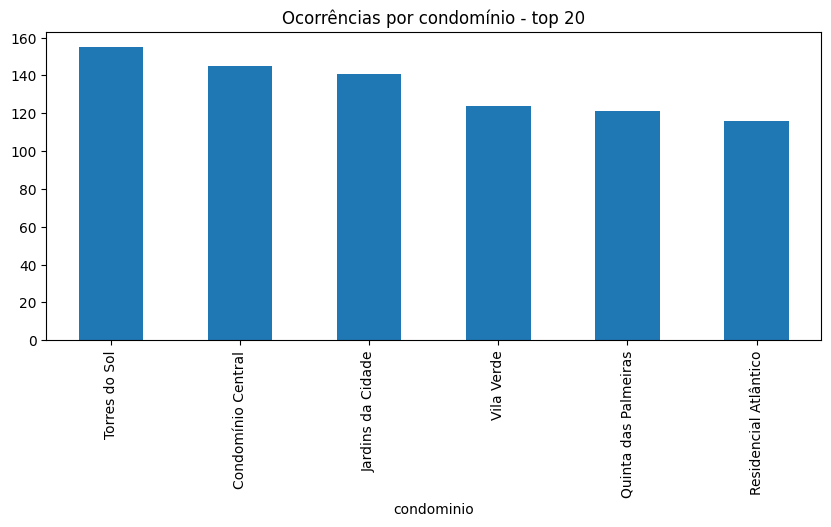

In [36]:
# A9: Events by condominium (if 'condominio' exists)
if 'condominio' in df.columns:
    q = "Quais condomínios têm mais ocorrências?"
    top_cond = df['condominio'].value_counts().head(20)
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)
    top_cond.plot(kind='bar', ax=ax)
    ax.set_title("Ocorrências por condomínio - top 20")
    plot_and_store(q, fig,
                   top_cond,
                   "Identifica condomínios com maior incidência, possível foco operativo.",
                   "Alocar recursos de manutenção proporcionalmente aos condomínios mais afetados.")



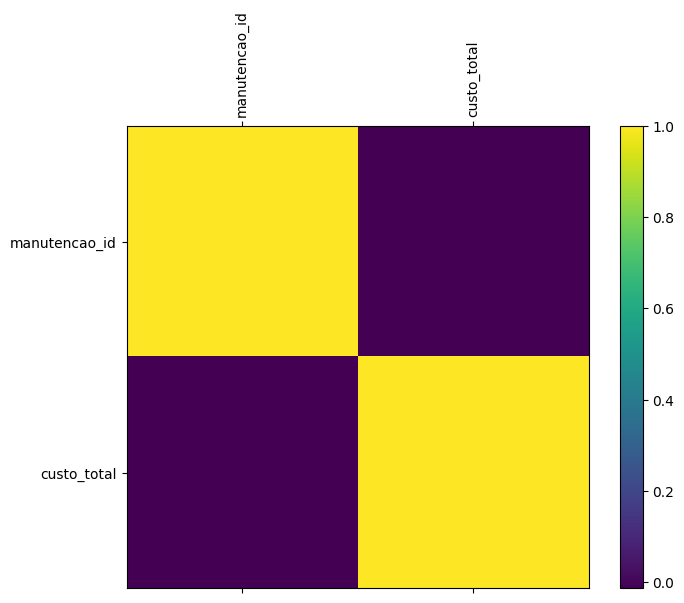

In [37]:
# A10: Correlation heatmap for numeric columns
if len(num_cols) >= 2:
    q = "Correlação entre variáveis numéricas"
    corr = df[num_cols].corr()
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr)
    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)
    fig.colorbar(cax)
    plot_and_store(q, fig,
                   corr,
                   "Correlação ajuda a identificar variáveis relacionadas (ex.: custo x área).",
                   "Usar regressões ou modelos para prever custos com base em features correlacionadas.")



In [38]:
# Present structured outputs
print("\n=== Sumário das 10 análises geradas ===\n")
for i, a in enumerate(analyses, 1):
    print(f"Análise {i}: {a['title']}")
    print("Interpretação técnica:", a['interpretation'])
    print("Insight de negócio:", a['insight'])
    print("Ação recomendada:", a['action'], "\n")

print("Arquivos gravados:")
print("-", out_path)


=== Sumário das 10 análises geradas ===

Análise 1: Que tipos de intervenção ocorrem com maior frequência?
Interpretação técnica: Mostra quais intervenções são mais frequentes, indicando foco operacional.
Insight de negócio: Alta concentração indica processos padronizados ou pontos críticos na infra-estrutura.
Ação recomendada: Priorizar procedimentos padrão e formação para os 3 tipos top; rever custos associados. 

Análise 2: Quais áreas (zonas) têm mais ocorrências?
Interpretação técnica: Identifica zonas com maior número de eventos.
Insight de negócio: Concentração em poucas áreas pode indicar problemas estruturais ou uso intensivo.
Ação recomendada: Programar inspeções preventivas específicas para as áreas top 5. 

Análise 3: Há tendência temporal nas notificações?
Interpretação técnica: Mostra variações mensais — picos podem indicar sazonalidade ou incidentes específicos.
Insight de negócio: Se picos coincidem com estações, planeamento sazonal é necessário.
Ação recomendada: Inve